Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 402 rows, 420 columns and 1806 nonzeros
Model fingerprint: 0x9cc03fff
Variable types: 0 continuous, 420 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 20 rows and 41 columns
Presolve time: 0.00s
Presolved: 382 rows, 379 columns, 1728 nonzeros
Variable types: 0 continuous, 379 integer (360 binary)
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.01 work units)
Thread count was 16 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0

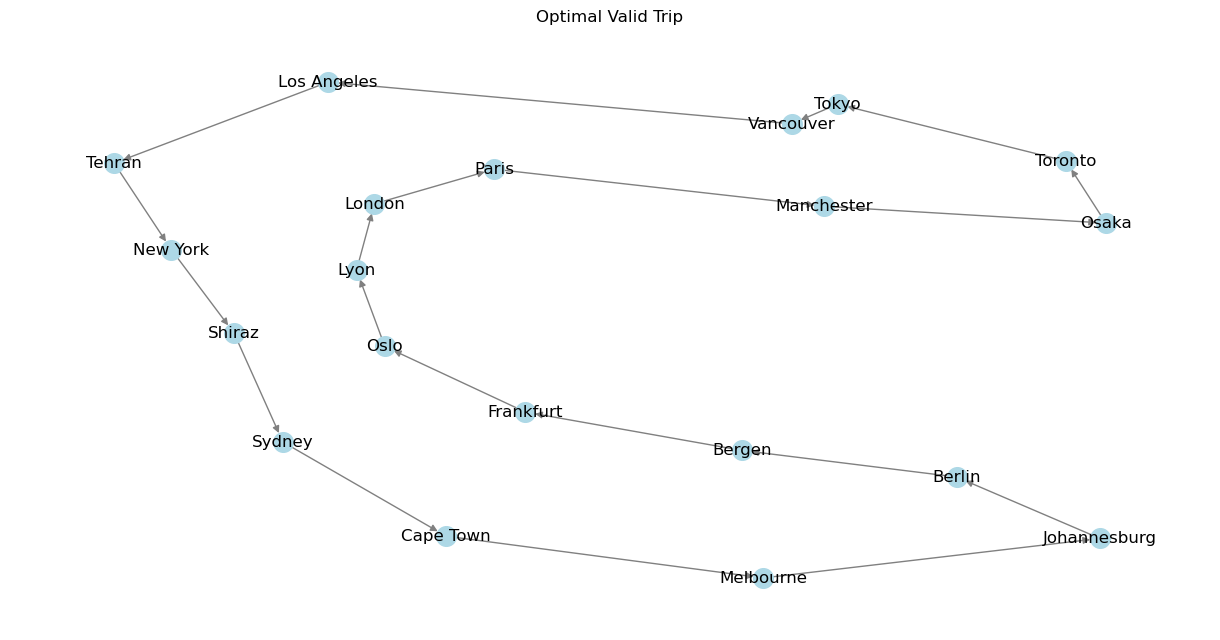

In [10]:
"""
Task 1: Optimal Valid Trip
Date: February 27, 2025
"""

from itertools import combinations
import networkx as nx
from gurobipy import Model, GRB
import matplotlib.pyplot as plt


cities = ["Berlin", "Frankfurt",
          "Melbourne", "Sydney",
          "New York", "Los Angeles",
          "Tokyo", "Osaka",
          "Paris", "Lyon",
          "London", "Manchester",
          "Toronto", "Vancouver",
          "Tehran", "Shiraz",
          "Cape Town", "Johannesburg",
          "Oslo", "Bergen"]

countries = {
    "Germany": ["Berlin", "Frankfurt"],
    "Australia": ["Melbourne", "Sydney"],
    "USA": ["New York", "Los Angeles"],
    "Japan": ["Tokyo", "Osaka"],
    "France": ["Paris", "Lyon"],
    "UK": ["London", "Manchester"],
    "Canada": ["Toronto", "Vancouver"],
    "Iran": ["Tehran", "Shiraz"],
    "South Africa": ["Cape Town", "Johannesburg"],
    "Norway": ["Oslo", "Bergen"]
    }

n = len(cities)

## Model
##****************************************************
model = Model("Valid Trip")

## Variables
x = model.addVars(n,n,vtype=GRB.BINARY,name="x")

u = model.addVars(n, vtype=GRB.INTEGER, name="u")

## Constraints
# Each city must be visited exactly once
for i in range(n):
    model.addConstr(sum(x[i, j] for j in range(n) if i !=j) == 1)
    model.addConstr(sum(x[j, i] for j in range(n) if i !=j) == 1)

# Subtour elimination
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            model.addConstr(u[i] - u[j] + n * x[i, j] <= n - 1)

#No consecutive cities from the same country
for country in countries.values():
    indices = [cities.index(city) for city in country]
    for i in indices:
        for j in indices:
            if i != j:
                model.addConstr(x[i, j] == 0)

# Solve the model
model.setObjective(0,GRB.MINIMIZE)

model.optimize()

if model.status == GRB.OPTIMAL:
    tour = []
    c_c = 0 #Current city
    while len(tour) < n:
        for j in range(n):
            if x[c_c, j].X > 0.5:
                tour.append(cities[c_c])
                c_c = j
                break
    tour.append(cities[c_c])

    print("Optimal valid trip:")
    print("->".join(tour))
    
    g = nx.DiGraph()
    
    for i in range(len(tour) - 1):
        g.add_edge(tour[i], tour[i + 1])
    
    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(g,seed=16)
    nx.draw(g, pos, with_labels= True, node_color="Lightblue",node_size = 200, edge_color="gray",arrows=True)
    
    plt.title("Optimal Valid Trip")
    plt.show()
else:
    print("No solution found")